#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load Dataset

In [2]:
train = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Dr Wiabu\\AA-NACL.csv')

In [3]:
aa = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Dr Wiabu\\AA-NACL.csv',header=0,
                    names=['temp','conductivity','velocity','nacl','aa'],dtype='float32')
ethanol = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Dr Wiabu\\ETHANOL-NACL.csv',header=0,
                    names=['temp','conductivity','velocity','nacl','aa'],dtype='float32')
khi = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Dr Wiabu\\KHI-NACL.csv',header=0,
                    names=['temp','conductivity','velocity','nacl','aa'],dtype='float32')
meg = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Dr Wiabu\\MEG-NACL.csv',header=0,
                    names=['temp','conductivity','velocity','nacl','aa'],dtype='float32')

In [4]:
aa.head()

,temp,conductivity,velocity,nacl,aa
0,0.0,0.090,1402.699951,0.0,0.2
1,0.0,0.190,1404.099976,0.0,0.5
2,0.0,0.329,1405.800049,0.0,1.0
3,0.0,0.430,1408.000000,0.0,1.5
4,0.0,0.550,1409.099976,0.0,2.0


In [5]:
aa.info()
# con_df = pd.DataFrame(con,columns=['ft','a'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          105 non-null    float32
 1   conductivity  105 non-null    float32
 2   velocity      105 non-null    float32
 3   nacl          105 non-null    float32
 4   aa            105 non-null    float32
dtypes: float32(5)
memory usage: 2.2 KB


In [6]:
# aaZeroT = aa.loc[aa['temp'] == 0]
# aaZeroNoT = aaZeroT.drop(['temp'], axis=1)
# aaZeroNoT

def getByTemp(df,t):
    aaZeroT = df.loc[df['temp'] == t]
    aaZeroNoT = aaZeroT.drop(['temp'], axis=1)
    return aaZeroNoT

In [7]:
# titanic_df[titanic_df['Survived']==1]['Survived']

def hydrateNaclCurve(df,x,y,c,title,xlab,ylab,cv1,cv2,cv3):
    
    legend_prop = {'weight':'bold','size':20}
    
    plt.plot(df[x].where(df[c] == cv1).dropna(), df[y].where(df[c] == cv1).dropna(),
             color='green',marker='o', label =str(cv1)+'% '+str(c))
    plt.plot(df[x].where(df[c] == cv2).dropna(), df[y].where(df[c] == cv2).dropna(),
             color='blue',marker='o', label =str(cv2)+'% '+str(c))
    plt.plot(df[x].where(df[c] == cv3).dropna(), df[y].where(df[c] == cv3).dropna(),
             color='red',marker='o', label =str(cv3)+'% '+str(c))
    plt.title(title, fontweight='bold',fontsize=15)
    plt.xlabel(xlab,fontsize=15)
    plt.ylabel(ylab,fontsize=15)
    plt.legend(prop=legend_prop)
    


In [8]:
# plt.figure(figsize=(7, 7))
def hydrateNaclCurve4(df,x,y,c,title,xlab,ylab,cv1,cv2,cv3,cv4):
    legend_prop = {'weight':'bold','size':20}
    
    plt.plot(df[x].where(df[c] == cv1).dropna(), df[y].where(df[c] == cv1).dropna(),marker='o',
             color='green', label =str(cv1)+'% '+str(c))
    plt.plot(df[x].where(df[c] == cv2).dropna(), df[y].where(df[c] == cv2).dropna(),marker='o',
             color='blue', label =str(cv2)+'% '+str(c))
    plt.plot(df[x].where(df[c] == cv3).dropna(), df[y].where(df[c] == cv3).dropna(),marker='o',
             color='red', label =str(cv3)+'% '+str(c))
    plt.plot(df[x].where(df[c] == cv4).dropna(), df[y].where(df[c] == cv4).dropna(),marker='o',
             color='yellow', label =str(cv4)+'% '+str(c))

    plt.title(title, fontweight='bold',fontsize=15)
    plt.xlabel(xlab,fontsize=15)
    plt.ylabel(ylab,fontsize=15)
    plt.legend(prop=legend_prop)

In [9]:
aaZeroNoT = getByTemp(aa,0)
aaNoT_4 = getByTemp(aa,4)
aaNoT_15 = getByTemp(aa,15)
aaNoT_25 = getByTemp(aa,25)

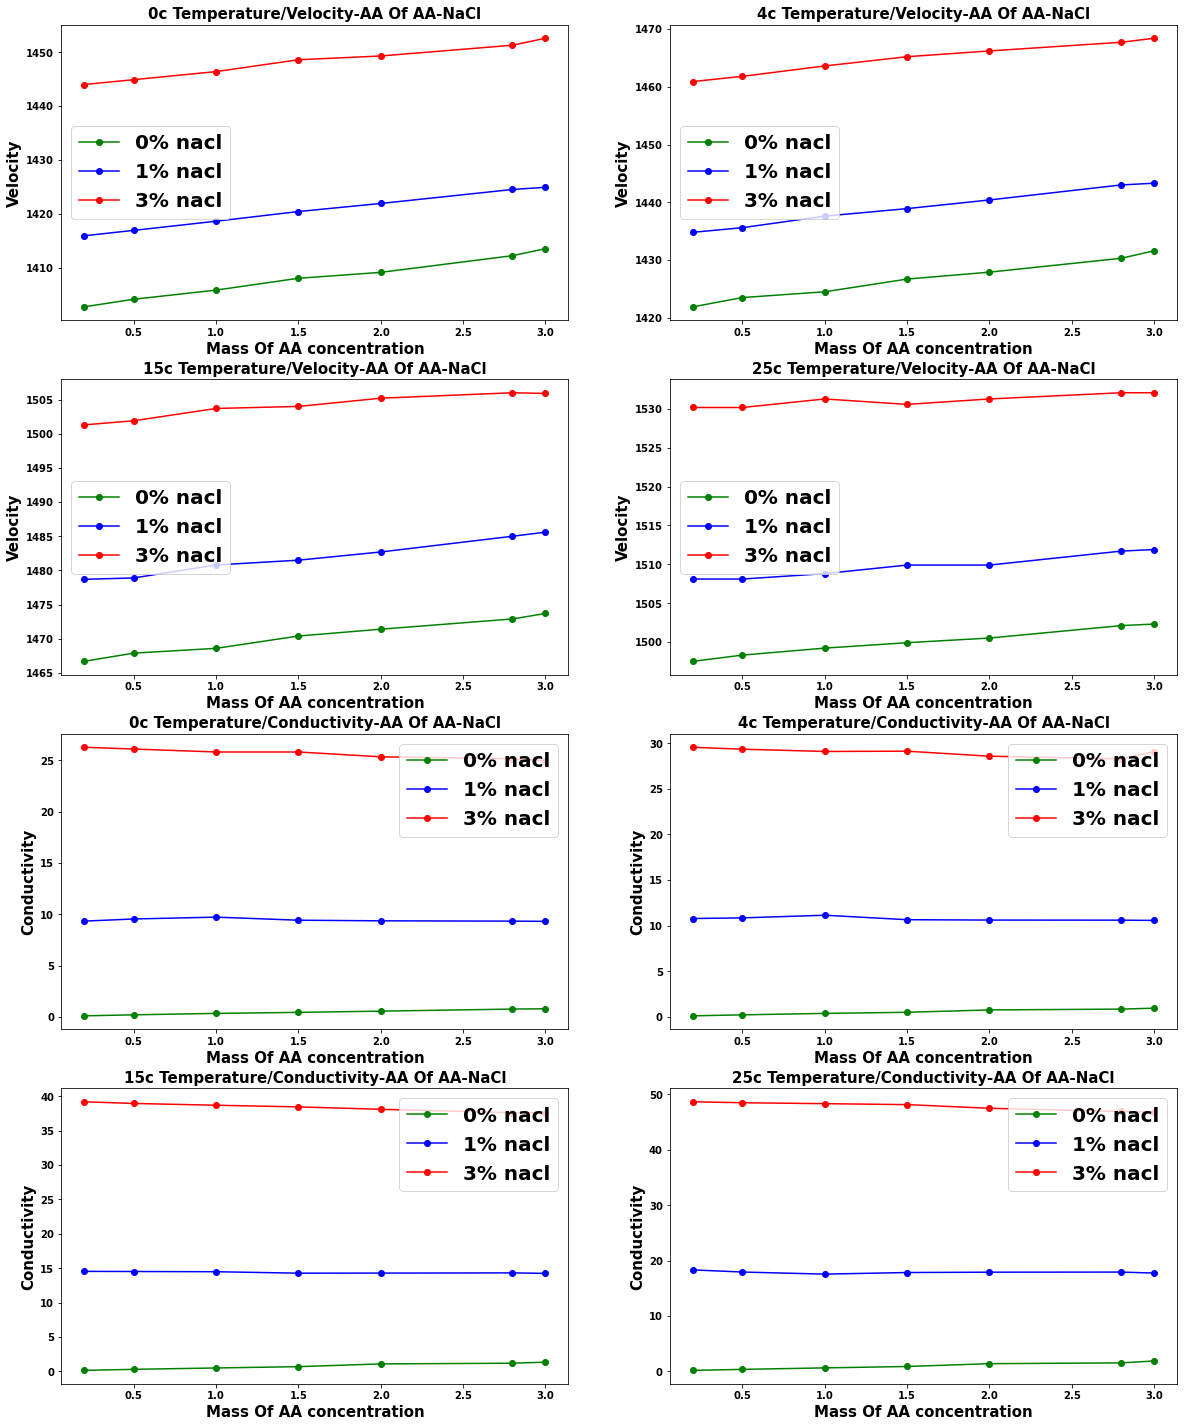

In [340]:
# FOR AA-NACL DATASET
plt.figure(figsize=(20, 25))
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
j = 1
tempt = ['0','4','15','25']
dataset = [aaZeroNoT,aaNoT_4,aaNoT_15,aaNoT_25]
for i in range(4):
    plt.subplot(4,2,j)
    hydrateNaclCurve(dataset[i],'aa','velocity','nacl',tempt[i]+'c Temperature/Velocity-AA Of AA-NaCl'
                 ,'Mass Of AA concentration','Velocity',0,1,3)
    j = j + 1

# FOR CONDUCTIVITY
j = 5
for i in range(4):
    plt.subplot(4,2,j)
    hydrateNaclCurve(dataset[i],'aa','conductivity','nacl',tempt[i]+'c Temperature/Conductivity-AA Of AA-NaCl'
                 ,'Mass Of AA concentration','Conductivity',0,1,3)
    j = j + 1

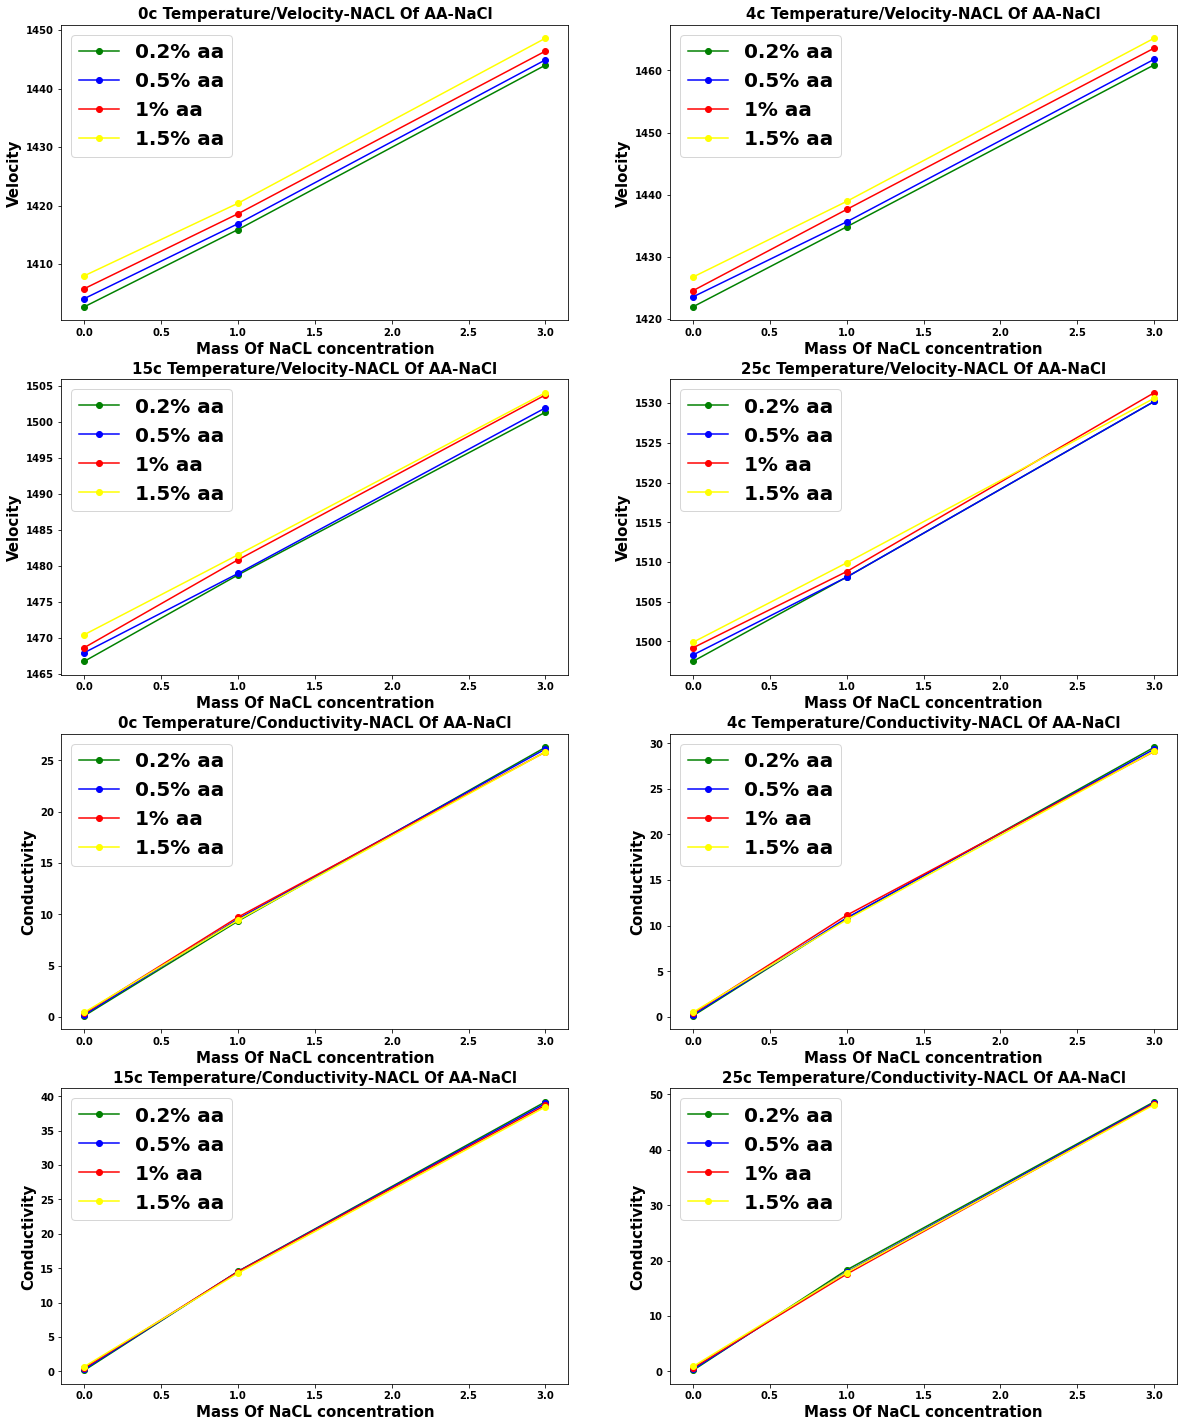

In [341]:
plt.figure(figsize=(20, 25))
j = 1
tempt = ['0','4','15','25']
dataset = [aaZeroNoT,aaNoT_4,aaNoT_15,aaNoT_25]

for i in range(4):
    plt.subplot(4,2,j)
    hydrateNaclCurve4(dataset[i],'nacl','velocity','aa',tempt[i]+'c Temperature/Velocity-NACL Of AA-NaCl'
                     ,'Mass Of NaCL concentration','Velocity',0.2,0.5,1,1.5)
    j = j + 1
    
j = 5
for i in range(4):
    plt.subplot(4,2,j)
    hydrateNaclCurve4(dataset[i],'nacl','conductivity','aa',tempt[i]+'c Temperature/Conductivity-NACL Of AA-NaCl'
                     ,'Mass Of NaCL concentration','Conductivity',0.2,0.5,1,1.5)
    j = j + 1

In [10]:
# meg['temp'].value_counts()
megNoT_15 = getByTemp(meg,15)
megNoT_25 = getByTemp(meg,25)

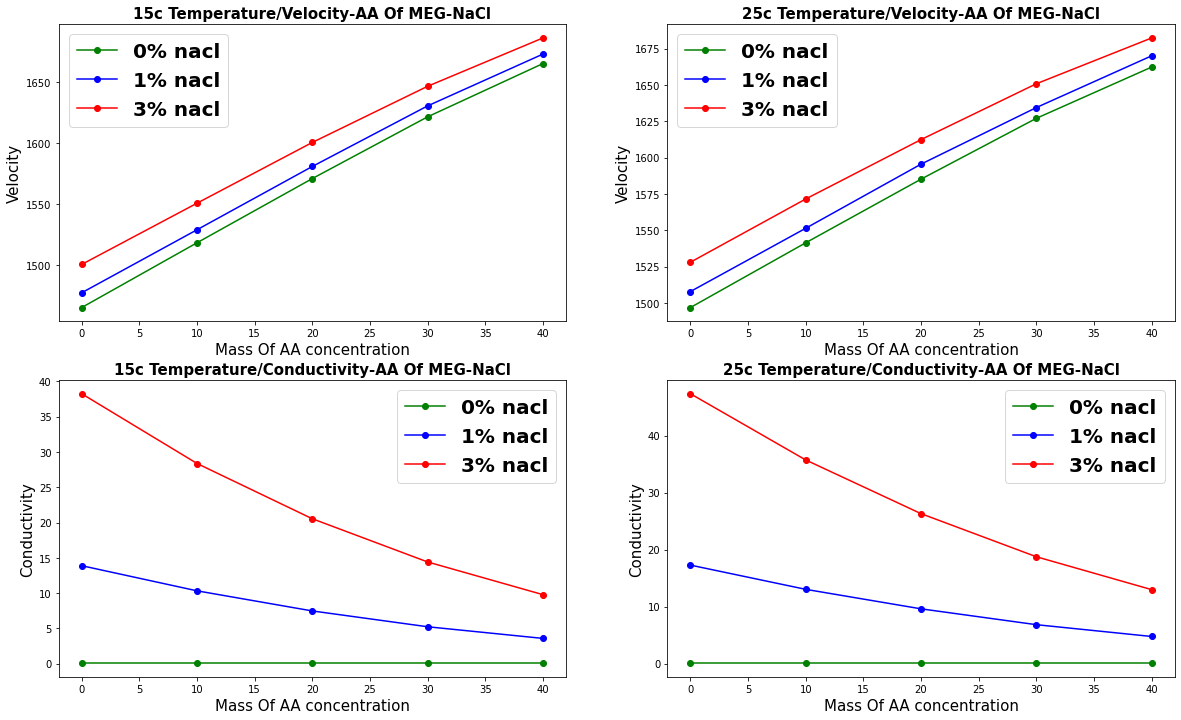

In [11]:
# MEG AT CONTACTS NACL
plt.figure(figsize=(20, 12))
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
j = 1
tempt_meg = ['15','25']
dataset_meg = [megNoT_15,megNoT_25]
for i in range(2):
    plt.subplot(2,2,j)
    hydrateNaclCurve(dataset_meg[i],'aa','velocity','nacl',tempt_meg[i]+'c Temperature/Velocity-AA Of MEG-NaCl'
                 ,'Mass Of AA concentration','Velocity',0,1,3)
    j = j + 1

# FOR CONDUCTIVITY
j = 3
for i in range(2):
    plt.subplot(2,2,j)
    hydrateNaclCurve(dataset_meg[i],'aa','conductivity','nacl',tempt_meg[i]+'c Temperature/Conductivity-AA Of MEG-NaCl'
                 ,'Mass Of AA concentration','Conductivity',0,1,3)
    j = j + 1

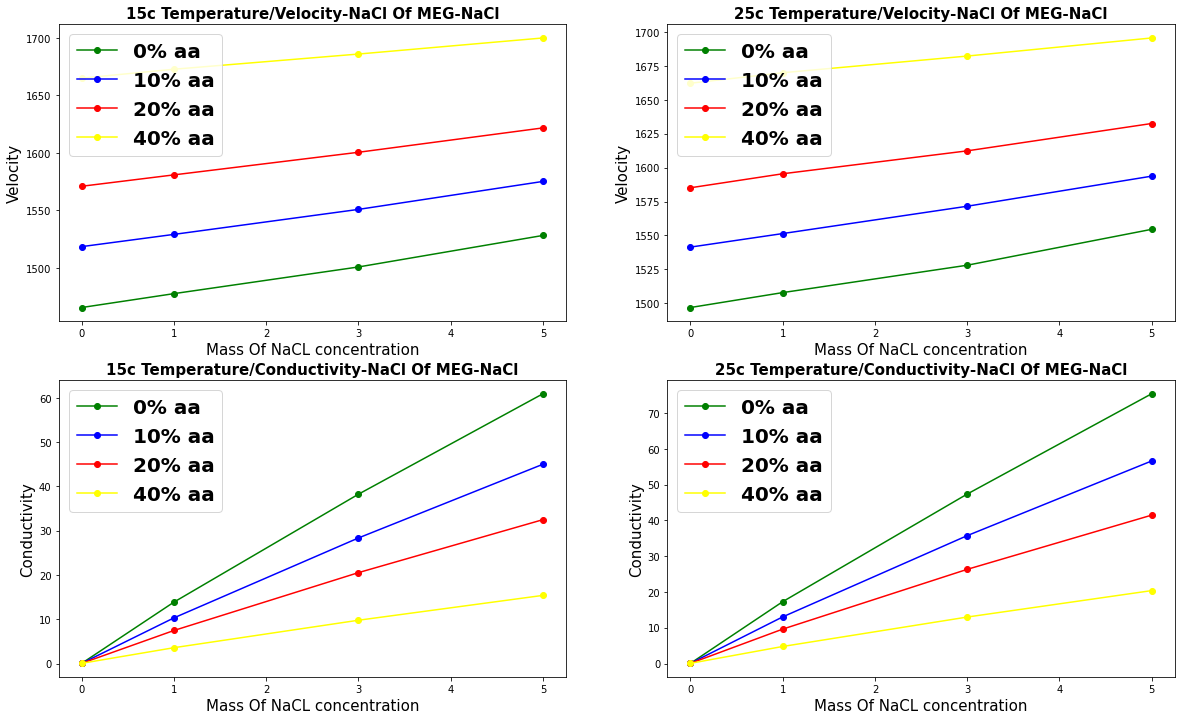

In [12]:
# MEG AT CONTACTS AA
plt.figure(figsize=(20, 12))
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
j = 1
tempt_meg = ['15','25']
dataset_meg = [megNoT_15,megNoT_25]
for i in range(2):
    plt.subplot(2,2,j)
    hydrateNaclCurve4(dataset_meg[i],'nacl','velocity','aa',tempt_meg[i]+'c Temperature/Velocity-NaCl Of MEG-NaCl'
                 ,'Mass Of NaCL concentration','Velocity',0,10,20,40)
    j = j + 1

# FOR CONDUCTIVITY
j = 3
for i in range(2):
    plt.subplot(2,2,j)
    hydrateNaclCurve4(dataset_meg[i],'nacl','conductivity','aa',tempt_meg[i]+'c Temperature/Conductivity-NaCl Of MEG-NaCl'
                 ,'Mass Of NaCL concentration','Conductivity',0,10,20,40)
    j = j + 1

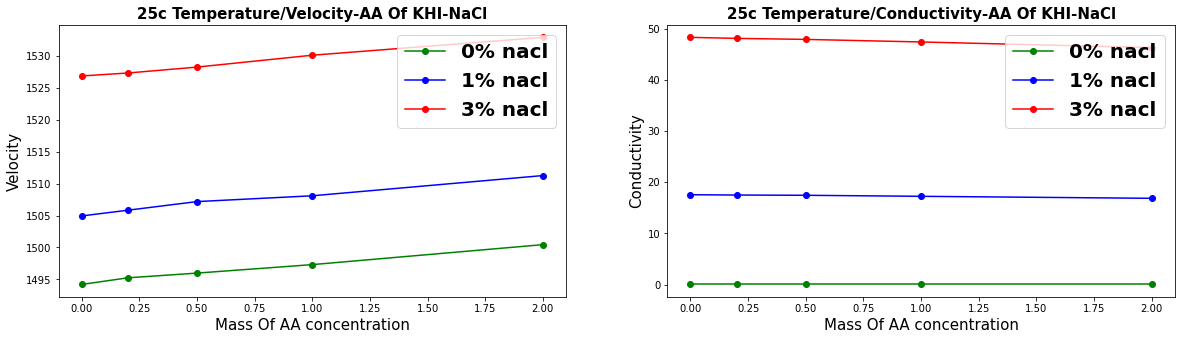

In [13]:
# KHI AT CONTACTS NACL
plt.figure(figsize=(20, 5))
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
j = 1
tempt_khi = ['25']
dataset_khi = [khi]
for i in range(1):
    plt.subplot(1,2,j)
    hydrateNaclCurve(dataset_khi[i],'aa','velocity','nacl',tempt_khi[i]+'c Temperature/Velocity-AA Of KHI-NaCl'
                 ,'Mass Of AA concentration','Velocity',0,1,3)
    j = j + 1

# FOR CONDUCTIVITY
j = 2
for i in range(1):
    plt.subplot(1,2,j)
    hydrateNaclCurve(dataset_khi[i],'aa','conductivity','nacl',tempt_khi[i]+'c Temperature/Conductivity-AA Of KHI-NaCl'
                 ,'Mass Of AA concentration','Conductivity',0,1,3)
    j = j + 1

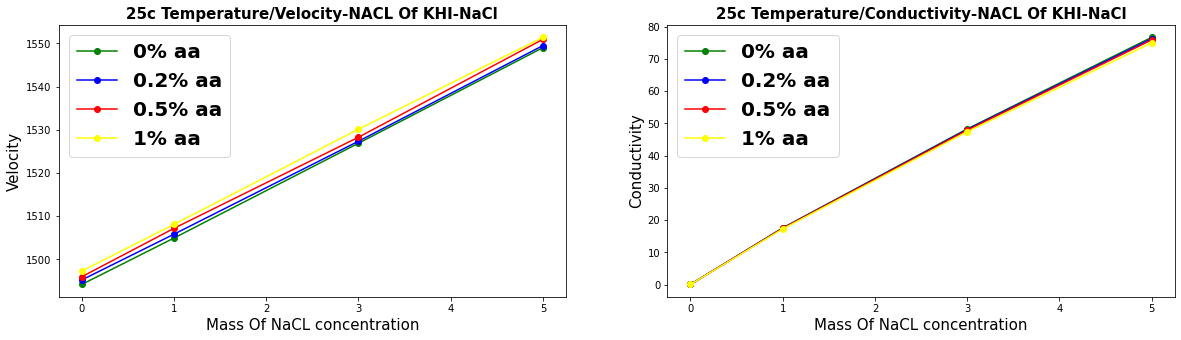

In [14]:
# KHI AT CONTACTS AA
plt.figure(figsize=(20, 5))
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
j = 1
tempt_khi = ['25']
dataset_khi = [khi]
for i in range(1):
    plt.subplot(1,2,j)
    hydrateNaclCurve4(dataset_khi[i],'nacl','velocity','aa',tempt_khi[i]+'c Temperature/Velocity-NACL Of KHI-NaCl'
                 ,'Mass Of NaCL concentration','Velocity',0,0.2,0.5,1)
    j = j + 1

# FOR CONDUCTIVITY
j = 2
for i in range(1):
    plt.subplot(1,2,j)
    hydrateNaclCurve4(dataset_khi[i],'nacl','conductivity','aa',tempt_khi[i]+'c Temperature/Conductivity-NACL Of KHI-NaCl'
                 ,'Mass Of NaCL concentration','Conductivity',0,0.2,0.5,1)
    j = j + 1

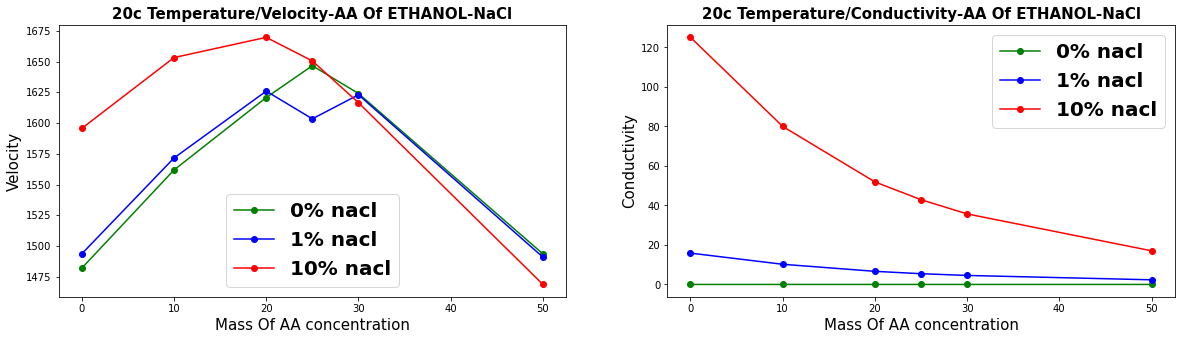

In [15]:
# ETHANOL AT CONTACTS NACL
plt.figure(figsize=(20, 5))
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
j = 1
tempt_eth = ['20']
dataset_eth = [ethanol]
for i in range(1):
    plt.subplot(1,2,j)
    hydrateNaclCurve(dataset_eth[i],'aa','velocity','nacl',tempt_eth[i]+'c Temperature/Velocity-AA Of ETHANOL-NaCl'
                 ,'Mass Of AA concentration','Velocity',0,1,10)
    j = j + 1

# FOR CONDUCTIVITY
j = 2
for i in range(1):
    plt.subplot(1,2,j)
    hydrateNaclCurve(dataset_eth[i],'aa','conductivity','nacl',tempt_eth[i]+'c Temperature/Conductivity-AA Of ETHANOL-NaCl'
                 ,'Mass Of AA concentration','Conductivity',0,1,10)
    j = j + 1

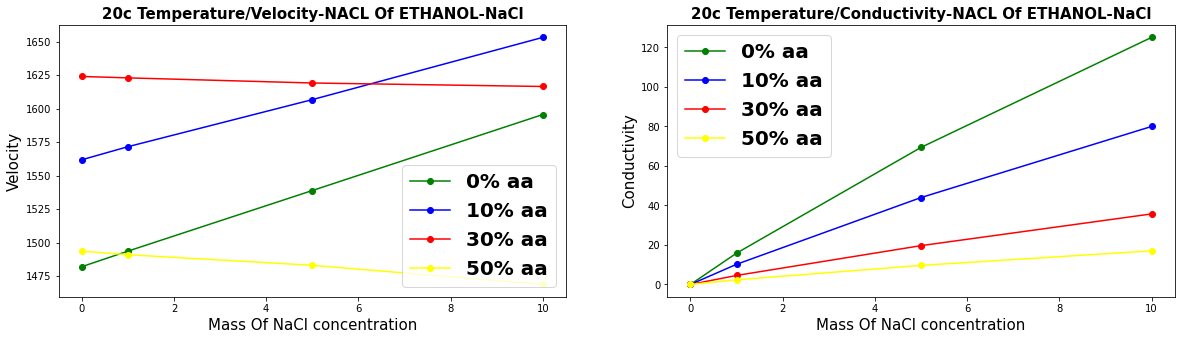

In [16]:
# ETHANOL AT CONTACTS AA
plt.figure(figsize=(20, 5))
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
j = 1
tempt_eth = ['20']
dataset_eth = [ethanol]
for i in range(1):
    plt.subplot(1,2,j)
    hydrateNaclCurve4(dataset_eth[i],'nacl','velocity','aa',tempt_eth[i]+'c Temperature/Velocity-NACL Of ETHANOL-NaCl'
                 ,'Mass Of NaCl concentration','Velocity',0,10,30,50)
    j = j + 1

# FOR CONDUCTIVITY
j = 2
for i in range(1):
    plt.subplot(1,2,j)
    hydrateNaclCurve4(dataset_eth[i],'nacl','conductivity','aa',tempt_eth[i]+'c Temperature/Conductivity-NACL Of ETHANOL-NaCl'
                 ,'Mass Of NaCl concentration','Conductivity',0,10,30,50)
    j = j + 1

In [2]:
!pip install jupyterthemes

In [4]:
import jupyterthemes as jt
# !jt -t oceans16
!jt -r
# Available themes:
# onedork grade3 oceans16 chesterish monokai solarizedl solarizedd

In [10]:
# titanic_df[titanic_df['Survived']==1]['Survived']

def hydrateNaclCurve(df,x,y,c,title,xlab,ylab,cv1,cv2,cv3):
    
    legend_prop = {'weight':'bold','size':20}
    
    plt.plot(df[x].where(df[c] == cv1).dropna(), df[y].where(df[c] == cv1).dropna(),
             color='green',marker='o', label =str(cv1)+'% '+str(c))
    plt.plot(df[x].where(df[c] == cv2).dropna(), df[y].where(df[c] == cv2).dropna(),
             color='blue',marker='o', label =str(cv2)+'% '+str(c))
    plt.plot(df[x].where(df[c] == cv3).dropna(), df[y].where(df[c] == cv3).dropna(),
             color='red',marker='o', label =str(cv3)+'% '+str(c))
    plt.title(title, fontweight='bold',fontsize=15)
    plt.xlabel(xlab,fontsize=15)
    plt.ylabel(ylab,fontsize=15)
    plt.legend(prop=legend_prop)
    

def hydrateNaclCurvePred2(df,df1,x,y,c,title,xlab,ylab,cv1,cv2,cv3):
    
    legend_prop = {'weight':'bold','size':20}
    
    plt.plot(df[x].where(df[c] == cv1).dropna(), df[y].where(df[c] == cv1).dropna(),
             'gp-',linewidth=2, markersize=12, label =str(cv1)+'% '+str(c))
    plt.plot(df1[x].where(df1[c] == cv1).dropna(), df1[y].where(df1[c] == cv1).dropna(),
             'gd--',linewidth=2, markersize=12, label =str(cv1)+'% '+str(c))
    
    plt.plot(df[x].where(df[c] == cv2).dropna(), df[y].where(df[c] == cv2).dropna(),
             'bp-',linewidth=2, markersize=12,  label =str(cv2)+'% '+str(c))
    plt.plot(df1[x].where(df1[c] == cv2).dropna(), df1[y].where(df1[c] == cv2).dropna(),
             'bd--',linewidth=2, markersize=12, label =str(cv2)+'% '+str(c))
    
    plt.plot(df[x].where(df[c] == cv3).dropna(), df[y].where(df[c] == cv3).dropna(),
             'mp-',linewidth=2, markersize=12, label =str(cv3)+'% '+str(c))
    plt.plot(df1[x].where(df1[c] == cv3).dropna(), df1[y].where(df1[c] == cv3).dropna(),
             'mp--',linewidth=2, markersize=12, label =str(cv3)+'% '+str(c))
    
    plt.title(title, fontweight='bold',fontsize=15)
    plt.xlabel(xlab,fontsize=15)
    plt.ylabel(ylab,fontsize=15)
    plt.legend(prop=legend_prop)    
    
    
# titanic_df[titanic_df['Survived']==1]['Survived']
# hydrateNaclCurve(dataset[i],'aa','velocity','nacl',tempt[i]+'c Temperature/Velocity-AA Of AA-NaCl'
#                  ,'Mass Of AA concentration','Velocity',0,1,3)
def hydrateNaclCurvePred3(df,df1,df2,x,y,c,title,xlab,ylab,cv1,cv2,cv3):
    
    legend_prop = {'weight':'bold','size':10}
    
    plt.plot(df[x].where(df[c] == cv1).dropna(), df[y].where(df[c] == cv1).dropna(),
             'gp-',linewidth=2, markersize=12, label =str(cv1)+'% '+str(c))
    plt.plot(df1[x].where(df1[c] == cv1).dropna(), df1[y].where(df1[c] == cv1).dropna(),
             'bd--',linewidth=2, markersize=12, label =str(cv1)+'% '+str(c))
    plt.plot(df2[x].where(df2[c] == cv1).dropna(), df2[y].where(df2[c] == cv1).dropna(),
             'ko:',linewidth=2, markersize=12, label =str(cv1)+'% '+str(c))
    
    plt.plot(df[x].where(df[c] == cv2).dropna(), df[y].where(df[c] == cv2).dropna(),
             'gp-',linewidth=2, markersize=12,  label =str(cv2)+'% '+str(c))
    plt.plot(df1[x].where(df1[c] == cv2).dropna(), df1[y].where(df1[c] == cv2).dropna(),
             'bd--',linewidth=2, markersize=12, label =str(cv2)+'% '+str(c))
    plt.plot(df2[x].where(df2[c] == cv2).dropna(), df2[y].where(df2[c] == cv2).dropna(),
             'kp:',linewidth=2, markersize=12, label =str(cv2)+'% '+str(c))
    
    plt.plot(df[x].where(df[c] == cv3).dropna(), df[y].where(df[c] == cv3).dropna(),
             'gp-',linewidth=2, markersize=12, label =str(cv3)+'% '+str(c))
    plt.plot(df1[x].where(df1[c] == cv3).dropna(), df1[y].where(df1[c] == cv3).dropna(),
             'bd--',linewidth=2, markersize=12, label =str(cv3)+'% '+str(c))
    plt.plot(df2[x].where(df2[c] == cv3).dropna(), df2[y].where(df2[c] == cv3).dropna(),
             'ko:',linewidth=2, markersize=12, label =str(cv3)+'% '+str(c))
    
    plt.title(title, fontweight='bold',fontsize=15)
    plt.xlabel(xlab,fontsize=15)
    plt.ylabel(ylab,fontsize=15)
    plt.legend(prop=legend_prop)

In [4]:
def getByTemp(df,t):
    aaZeroT = df.loc[df['temp'] == t]
    aaZeroNoT = aaZeroT.drop(['temp'], axis=1)
    return aaZeroNoT

In [6]:
test_org=pd.read_csv('E:\\desktop files\\weka\\Datasets\\Dr Wiabu\\aa-nacl-generated\\aa-results\\for-graphs\\test_org.csv',
                             header=0,names=['temp','velocity','conductivity','nacl','aa'],dtype='float32')
dt_pred=pd.read_csv('E:\\desktop files\\weka\\Datasets\\Dr Wiabu\\aa-nacl-generated\\aa-results\\for-graphs\\dt_pred.csv',
                             header=0,names=['temp','velocity','conductivity','nacl','aa'],dtype='float32')
mt_linear_predicted=pd.read_csv('E:\\desktop files\\weka\\Datasets\\Dr Wiabu\\aa-nacl-generated\\aa-results\\for-graphs\\mt_linear_predicted.csv',
                             header=0,names=['temp','velocity','conductivity','nacl','aa'],dtype='float32')
rf_nacl_rt_aa_pred=pd.read_csv('E:\\desktop files\\weka\\Datasets\\Dr Wiabu\\aa-nacl-generated\\aa-results\\for-graphs\\rf_nacl_rt_aa_pred.csv',
                             header=0,names=['temp','velocity','conductivity','nacl','aa'],dtype='float32')

In [8]:
# aa_dt_pred
dt_pred_0 = getByTemp(dt_pred,0)
dt_pred_4 = getByTemp(dt_pred,4)
dt_pred_15 = getByTemp(dt_pred,15)
dt_pred_25 = getByTemp(dt_pred,25)

# test org
test_org_0 = getByTemp(test_org,0)
test_org_4 = getByTemp(test_org,4)
test_org_15 = getByTemp(test_org,15)
test_org_25 = getByTemp(test_org,25)

# mt_linear_predicted
mt_linear_pred_0 = getByTemp(mt_linear_predicted,0)
mt_linear_pred_4 = getByTemp(mt_linear_predicted,4)
mt_linear_pred_15 = getByTemp(mt_linear_predicted,15)
mt_linear_pred_25 = getByTemp(mt_linear_predicted,25)

# rf_nacl_rt_aa_pred
rf_nacl_rt_aa_pred_0 = getByTemp(rf_nacl_rt_aa_pred,0)
rf_nacl_rt_aa_pred_4 = getByTemp(rf_nacl_rt_aa_pred,4)
rf_nacl_rt_aa_pred_15 = getByTemp(rf_nacl_rt_aa_pred,15)
rf_nacl_rt_aa_pred_25 = getByTemp(rf_nacl_rt_aa_pred,25)


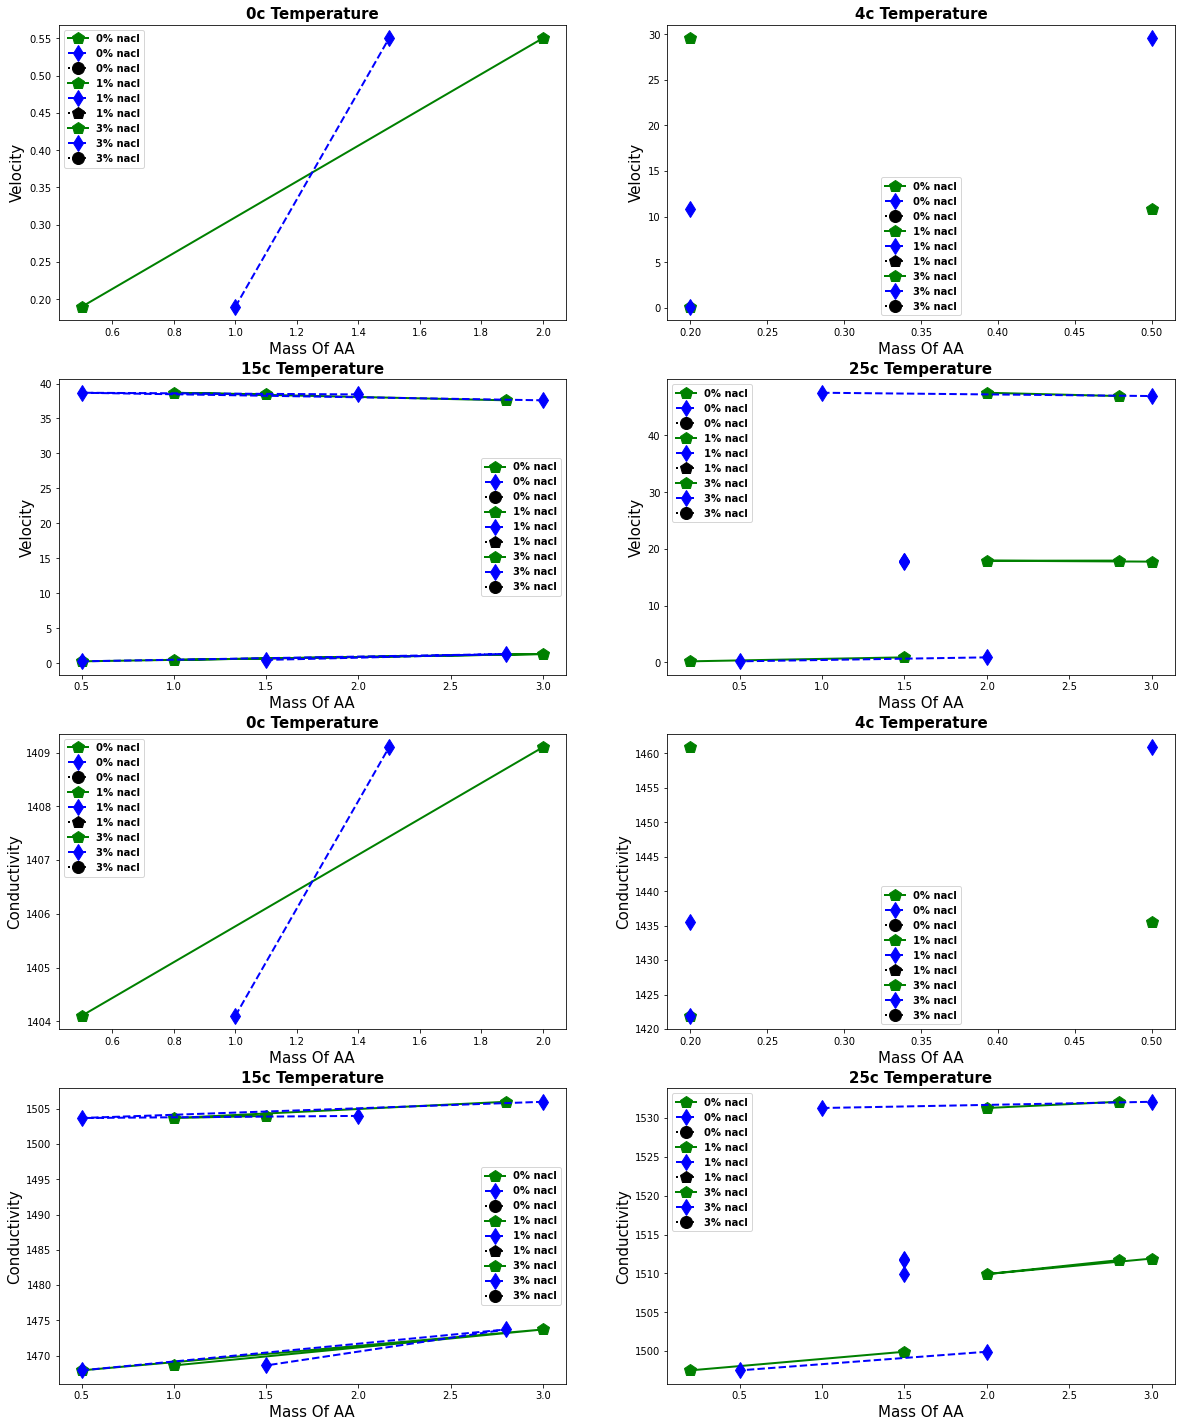

In [11]:
# FOR AA-NACL DATASET
plt.figure(figsize=(20, 25))
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
j = 1
tempt = ['0','4','15','25']
dataset = [test_org_0,test_org_4,test_org_15,test_org_25] #aaNoT_0 weka_RT_aa_0
dataset2 = [dt_pred_0,dt_pred_4,dt_pred_15,dt_pred_25] #aa_dt_pred_0
# dataset4 = [mt_linear_pred_0,mt_linear_pred_4,mt_linear_pred_15,mt_linear_pred_25] #aa_dt_pred_0
dataset3 = [mt_linear_pred_0,mt_linear_pred_4,mt_linear_pred_15,mt_linear_pred_25] #aa_dt_pred_0


for i in range(4):
    plt.subplot(4,2,j)
    hydrateNaclCurvePred3(dataset[i],dataset2[i],dataset3[i],'aa','velocity','nacl',
                          tempt[i]+'c Temperature','Mass Of AA','Velocity',
                          0,1,3)
    j = j + 1

# FOR CONDUCTIVITY
j = 5
for i in range(4):
    plt.subplot(4,2,j)
    hydrateNaclCurvePred3(dataset[i],dataset2[i],dataset3[i],'aa','conductivity',
                          'nacl',tempt[i]+'c Temperature','Mass Of AA','Conductivity',
                          0,1,3)
    j = j + 1